In [1]:
import numpy as np
import pickle

with open('../data/features/'  + 'features.pickle', 'rb') as file:
     features = pickle.load(file)

In [2]:
dict_list = list(features)

print('NUMEBR OF CASE_ID: ', len(dict_list))
print(dict_list)

feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), features[dict_list[0]] )))
print('NUMEBR OF FEATURES: ', len(feature_names))

NUMEBR OF CASE_ID:  50
[('BO77', 'T2'), ('BO48', 'T2'), ('BO47', 'T2'), ('BO78', 'T2'), ('BO40', 'T2AX'), ('BO76', 'T2'), ('BO82', 'T2'), ('BO49', 'T2'), ('BO85', 'T2'), ('BO71', 'T2'), ('BO2', 'T2AX'), ('BO54', 'T2'), ('BO31', 't2DEF'), ('BO36', 'T2AX'), ('BO38', 'T2AXAlta'), ('BO38', 'T2AXbassa'), ('BO64', 'T2'), ('BO90', 'T25mm'), ('BO63', 'T2'), ('BO52', 'T2'), ('BO39', 'T2AX'), ('BO37', 'T2AX'), ('BO74', 'T2'), ('BO45', 'T2'), ('BO42', 'T2AX'), ('BO29', 'T2AX'), ('BO16', 'T2AX'), ('BO11', 'T2AX'), ('BO18', 'T2AX'), ('BO43', 'T2AX'), ('BO44', 'T2AX'), ('BO86', 'T2'), ('BO72', 'T2'), ('BO75', 'T2'), ('BO26', 'T2AX'), ('BO28', 'T2AX'), ('BO17', 'T2AX'), ('BO9', 'T2AX'), ('BO1', 'T2AX'), ('BO35', 'T2AX'), ('BO32', 'T2AX'), ('BO68', 'T2'), ('BO50', 'T2'), ('BO66', 'T2'), ('BO61', 'T2'), ('BO33', 'T2AX'), ('BO60', 'T2'), ('BO51', 'T2'), ('BO56', 'T2'), ('BO56', 'T25mm')]
NUMEBR OF FEATURES:  100


In [3]:
samples = np.zeros((len(dict_list), len(feature_names)))

for k, case_id in enumerate(dict_list):
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, features[case_id][feature_name])
    samples[k, ...] = a

#for possible NaNs
samples = np.nan_to_num(samples)

samples.shape

(50, 100)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

d = pd.DataFrame(data=samples, columns=feature_names)

d.describe()

original_firstorder_10Percentile  original_firstorder_90Percentile  \
count                         50.000000                         50.000000   
mean                          31.860000                         77.636000   
std                           12.455652                         37.269514   
min                            7.000000                         20.000000   
25%                           24.000000                         55.500000   
50%                           32.000000                         66.000000   
75%                           38.750000                         91.000000   
max                           73.000000                        190.000000   

       original_firstorder_Energy  original_firstorder_Entropy  \
count                5.000000e+01                    50.000000   
mean                 4.657660e+07                     1.460271   
std                  8.008121e+07                     0.483608   
min                  3.586890e+06                     0.200041   
25%                  1.283366e+07                     1.108816   
50%                  2.249416e+07                     1.400317   
75%                  5.012374e+07                     1.760032   
max                  5.436121e+08                     2.483341   

       original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
count                               50.000000                     50.000000   
mean                                23.480000                      5.177957   
std                                 19.999224                      2.400877   
min                                  5.000000                      1.368843   
25%                                 13.250000                      3.530498   
50%                                 19.500000                      4.778897   
75%                                 23.000000                      6.741871   
max                                119.000000                     12.583758   

       original_firstorder_Maximum  original_firstorder_Mean  \
count                    50.000000                 50.000000   
mean                    134.420000                 52.447042   
std                      41.303797                 22.401079   
min                      45.000000                 12.913601   
25%                     104.250000                 39.860705   
50%                     139.000000                 49.349373   
75%                     166.500000                 61.698823   
max                     216.000000                123.859657   

       original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
count                                  50.000000                   50.000000   
mean                                   14.666461                   49.970000   
std                                     9.870420                   24.117571   
min                                     3.872854                   12.000000   
25%                                     8.979832                   38.000000   
50%                                    11.792728                   45.000000   
75%                                    16.145637                   55.750000   
max                                    55.739908                  152.000000   

       ...  original_shape_Maximum2DDiameterColumn  \
count  ...                               50.000000   
mean   ...                               68.484670   
std    ...                               36.588025   
min    ...                               31.240999   
25%    ...                               48.018224   
50%    ...                               56.185563   
75%    ...                               73.428037   
max    ...                              236.000000   

       original_shape_Maximum2DDiameterRow  \
count                            50.000000   
mean                             88.793913   
std                              38.574088   
min                              35.9

### PCA

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

scaled_features = scaler.fit_transform(d.values)
scaled_features_df = pd.DataFrame(scaled_features, index=d.index, columns=d.columns)

#scaled_features_df.describe()

In [6]:
pca = PCA(.95)

#fit = pca.fit(scaled_features)
X_pca = pca.fit_transform(scaled_features)
print('PC Variance Ratio: ', f'\n{pca.explained_variance_ratio_}') 

PC Variance Ratio:  
[0.41192061 0.15732857 0.10137495 0.07054797 0.05426697 0.03202988
 0.03043444 0.02497832 0.02197234 0.01517367 0.01234071 0.01042507
 0.00837038]


In [7]:
print('Number of PC: ', pca.components_.shape[0])
print('PC components module: ', f'\n{abs( pca.components_ )}')

Number of PC:  13
PC components module:  
[[0.11066087 0.14230628 0.06093377 ... 0.0752006  0.02697085 0.06349379]
 [0.06157604 0.07804552 0.11180062 ... 0.16014417 0.12231365 0.17377644]
 [0.11714976 0.04761848 0.15304677 ... 0.11769455 0.19531194 0.14948561]
 ...
 [0.04326724 0.04050812 0.19178502 ... 0.03857799 0.06003793 0.01006087]
 [0.07628942 0.01754825 0.12842648 ... 0.01262802 0.03621707 0.06839871]
 [0.10627661 0.05159973 0.1612952  ... 0.12115152 0.00900154 0.06681058]]


In [8]:
n_pcs = pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)

[3, 59, 78, 43, 93, 84, 14, 87, 79, 90, 92, 5, 86]


In [9]:
initial_feature_names = list(scaled_features_df.columns)

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

0                                               1
0    PC0                     original_firstorder_Entropy
1    PC1     original_glrlm_LongRunHighGrayLevelEmphasis
2    PC2            original_glszm_SizeZoneNonUniformity
3    PC3                original_gldm_DependenceVariance
4    PC4                original_shape_Maximum3DDiameter
5    PC5                   original_glszm_ZonePercentage
6    PC6                    original_firstorder_Skewness
7    PC7                         original_shape_Flatness
8    PC8  original_glszm_SizeZoneNonUniformityNormalized
9    PC9          original_shape_Maximum2DDiameterColumn
10  PC10           original_shape_Maximum2DDiameterSlice
11  PC11                    original_firstorder_Kurtosis
12  PC12                       original_shape_Elongation

In [10]:
pca_features_list = list(df.loc[:, 1].values)
print(pca_features_list)

principal_components_df = d[pca_features_list]
scaled_principal_components_df = scaled_features_df[pca_features_list]

['original_firstorder_Entropy', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformity', 'original_gldm_DependenceVariance', 'original_shape_Maximum3DDiameter', 'original_glszm_ZonePercentage', 'original_firstorder_Skewness', 'original_shape_Flatness', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterSlice', 'original_firstorder_Kurtosis', 'original_shape_Elongation']


## UMAP

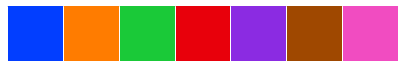

In [11]:
import sklearn.cluster as cluster
import umap
import hdbscan

plt.style.use('seaborn')
cmap = sns.color_palette("bright", 8)
cmap.remove(cmap[-1])
sns.palplot(cmap)

Text(0.5, 1.0, 'UMAP min_dist=0.0 n_neigbors=3 metric=euclidean')

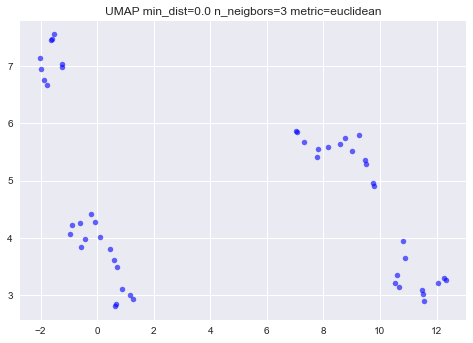

In [12]:
min_dist = 0.0
n_neighbors = 3
metric="euclidean"
learning_rate = 0.9

standard_embedding = umap.UMAP(min_dist=min_dist, n_neighbors=n_neighbors, metric=metric, learning_rate=learning_rate,random_state=42).fit_transform(scaled_features_df.values)

plt.scatter(*standard_embedding.T, s=30, linewidth=0, c='b', alpha=0.6 )
plt.title(f'UMAP min_dist={min_dist} n_neigbors={n_neighbors} metric={metric}')

Text(0.5, 1.0, 'KMeans k = 3')

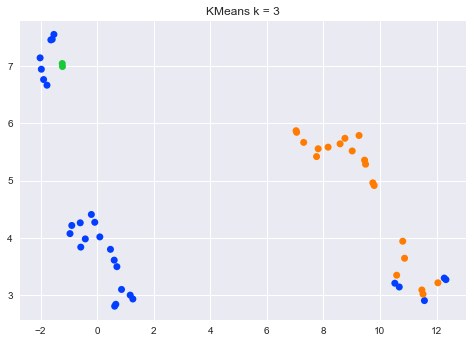

In [13]:
K = 3
kmeans_labels = cluster.KMeans(K).fit_predict(scaled_features_df.values)

cluster_colors = [cmap[x] 
                  for x in kmeans_labels]

plt.scatter(*standard_embedding.T, linewidth=0, c=cluster_colors)
plt.title(f'KMeans k = {K}')

Text(0.5, 1.0, 'HDBSCAN min_cluster size = 2')

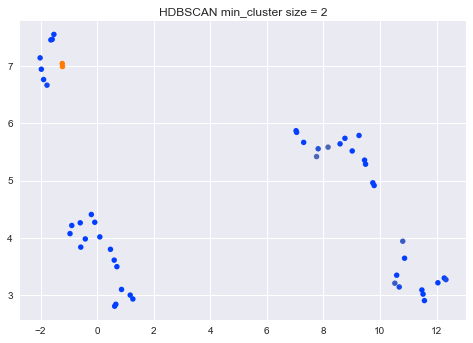

In [14]:
min_cluster_size = 2
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit(scaled_features_df.values)
labels = clusterer.labels_

cluster_colors = [cmap[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_ )]
plt.scatter(*standard_embedding.T, s=30, linewidth=0, c=cluster_member_colors)

plt.title(f'HDBSCAN min_cluster size = {min_cluster_size}')

Text(0.5, 1.0, 'HDBSCAN outliers')

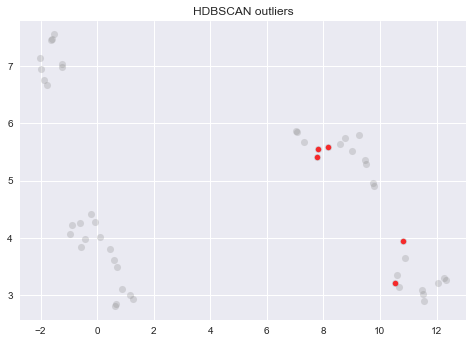

In [15]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*standard_embedding.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*standard_embedding[outliers].T, s=30, linewidth=0, c='red', alpha=0.8)
plt.title(f'HDBSCAN outliers')

Text(0.5, 1.0, 'outlier_scores')

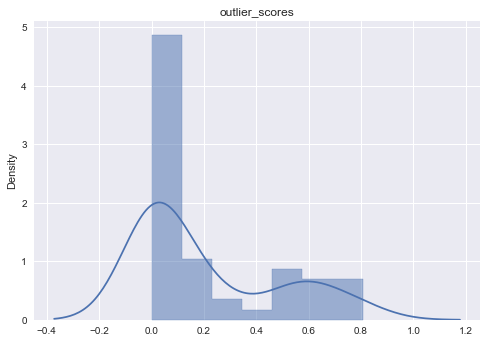

In [16]:
clusterer.outlier_scores_

sns.histplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], kde=True, stat="density", kde_kws={"cut": 3}, element="step")
plt.title("outlier_scores")

Text(0.5, 1.0, 'condensed_tree')

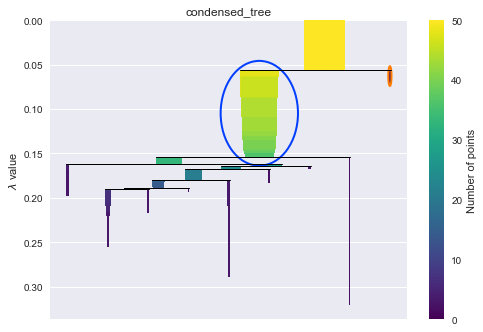

In [17]:
clusterer.condensed_tree_
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=cmap)
plt.title("condensed_tree")

Text(0.5, 1.0, 'single_linkage_tree')

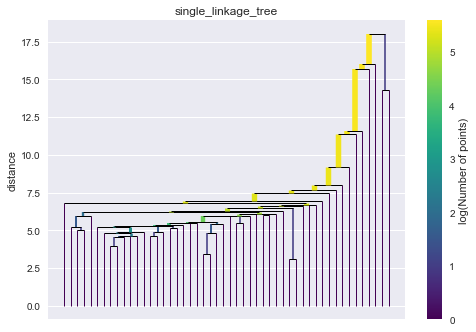

In [18]:
clusterer.single_linkage_tree_
clusterer.single_linkage_tree_.plot()
plt.title("single_linkage_tree")

In [19]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

## KMEANS

In [20]:
def kmeans_plots(k_list, values, n_neighbors, cmap=cmap, n_steps=10, metric='euclidean',step=0.1, figsize = (10, 8), cols = 3, save=False, **kwargs):
    for k in k_list:

        a = np.arange(0, n_steps*step + step, step)

        cases = [(x, k) for x in a ]

        rows = len(cases) // cols + 1

        axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
        axs = trim_axs(axs, len(cases))
        plt.suptitle(f'KMeans k={k}', fontsize = 20)

        for ax, case in zip(axs, cases):

            standard_embedding = umap.UMAP(min_dist=case[0].astype(float), n_neighbors=n_neighbors, metric=metric, random_state=42).fit_transform(values)
            kmeans_labels = cluster.KMeans(case[1]).fit_predict(values)
            cluster_colors = [cmap[x] 
                  for x in kmeans_labels]
            ax.scatter(*standard_embedding.T, c=cluster_colors, s=20)
            
            ax.set_title(f'UMAP min_dist={"%.2f" %case[0]} n_neighbors={n_neighbors} metric={metric}', fontsize=9)
            ax.set_aspect('equal', 'datalim')
        if save:
            out_path = kwargs.get('path')
            plt.savefig(out_path + '/' + f'k={k}_n_neighbors={n_neighbors}_metric={metric}' + '.png', facecolor='w')
    plt.show()

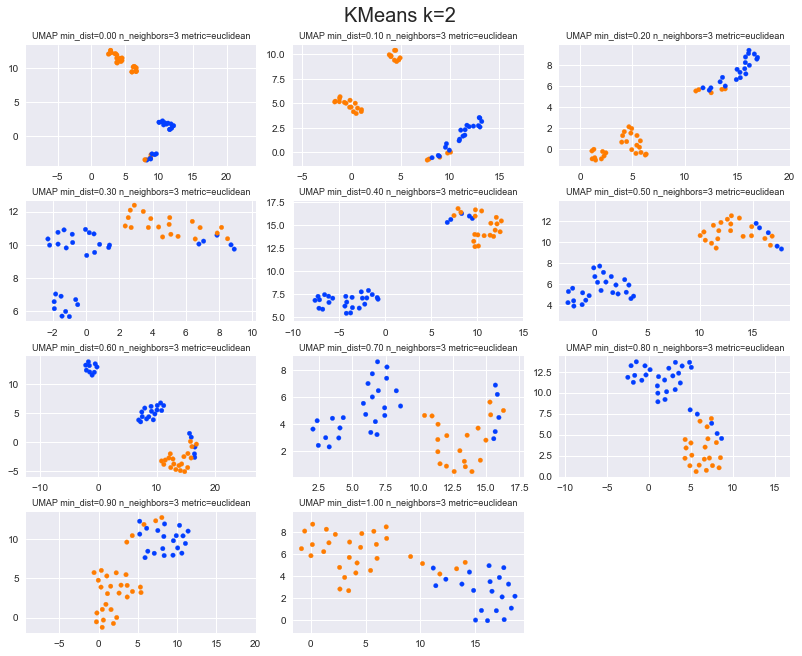

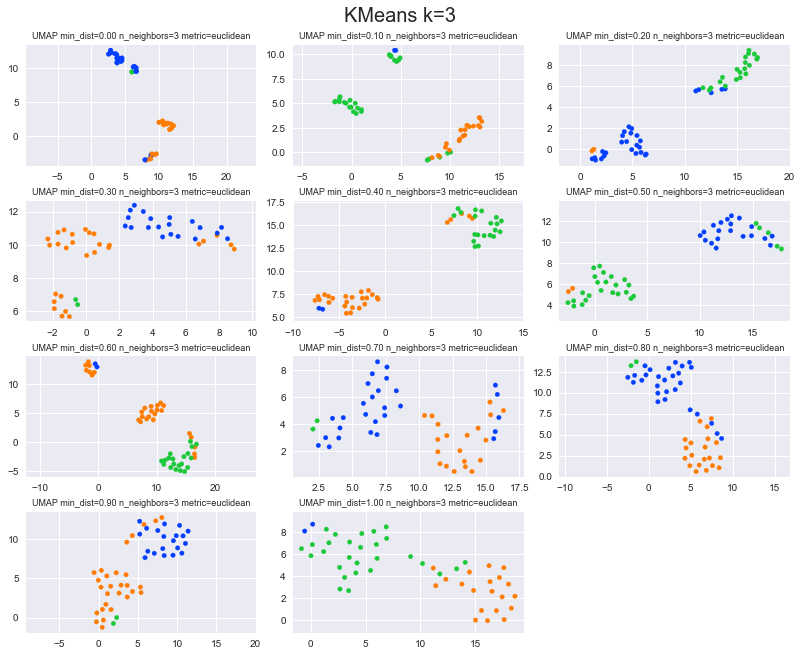

In [21]:
path = '../data/features/plots/Kmeans'

k_list = [2, 3]

kmeans_plots(k_list, scaled_features_df.values, n_neighbors=3, figsize = (11, 9), save=True, path=path)

## HDBSCAN

In [22]:
def HDBSCAN_plots(min_cluster_size_list, values, n_neighbors, n_steps=10, metric='euclidean', step=0.1, figsize = (10, 8), cols = 3, save=False, **kwargs):
    for min_cluster_size in min_cluster_size_list:

        a = np.arange(0, n_steps * step + step, step)

        cases = [(x, min_cluster_size) for x in a ]

        rows = len(cases) // cols + 1

        axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
        axs = trim_axs(axs, len(cases))
        plt.suptitle(f'HDBSCAN min_cluster_size={min_cluster_size}', fontsize = 18)

        for ax, case in zip(axs, cases):

            standard_embedding = umap.UMAP(min_dist=case[0].astype(float), n_neighbors=n_neighbors, metric=metric,random_state=42).fit_transform(values)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=case[1]).fit(values)
            labels = clusterer.labels_

            color_palette = sns.color_palette('bright', 8)
            cluster_colors = [color_palette[x] if x >= 0
                            else (0.5, 0.5, 0.5)
                            for x in clusterer.labels_]
            cluster_member_colors = [sns.desaturate(x, p) for x, p in
                                    zip(cluster_colors, clusterer.probabilities_)]
            ax.scatter(*standard_embedding.T, linewidth=0, s=18, c=cluster_member_colors, alpha=0.9)

            
            ax.set_title(f'UMAP min_dist={"%.2f" %case[0]} n_neighbors={n_neighbors} metric={metric}', fontsize=9)
            ax.set_aspect('equal', 'datalim')


        if save:
            out_path = kwargs.get('path')
            plt.savefig(out_path + '/' + f'min_cluster_size={min_cluster_size}_n_neighbors={n_neighbors}_metric={metric}' + '.png', facecolor='w')            
    plt.show()

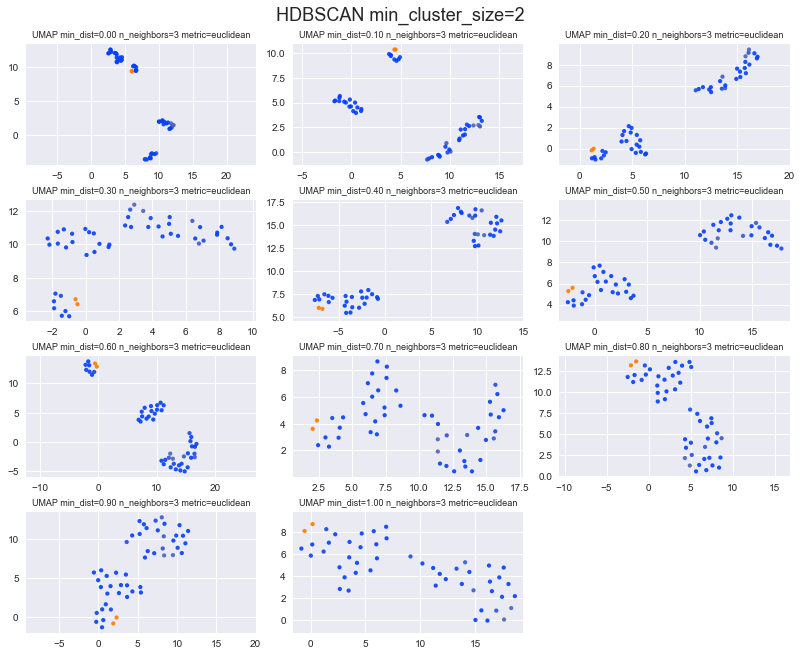

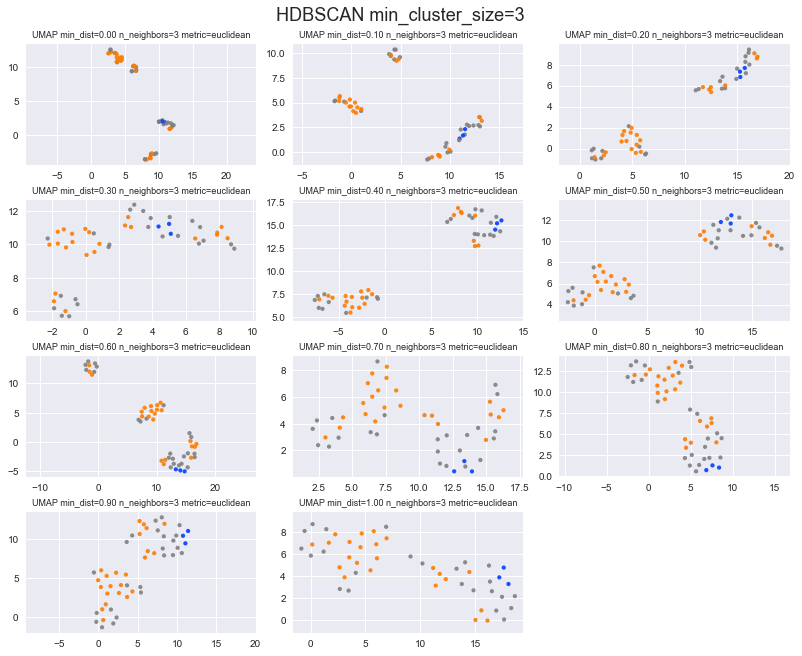

In [23]:
path = '../data/features/plots/HDBSCAN'

min_cluster_size_list = [2, 3]

HDBSCAN_plots(min_cluster_size_list, scaled_features_df.values, metric='euclidean',n_neighbors=3, figsize = (11, 9), cols = 3, save=True, path=path)

# PC

Text(0.5, 1.0, 'UMAP min_dist=0.0 n_neigbors=3 metric=euclidean')

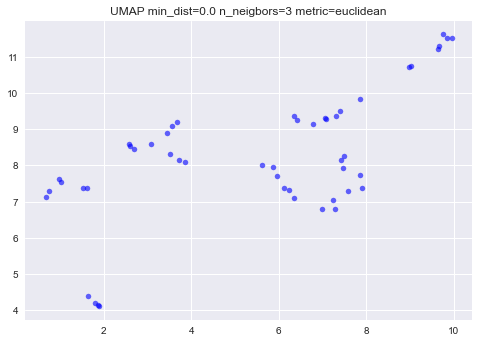

In [24]:
min_dist = 0.0
n_neighbors = 3
metric="euclidean"


standard_embedding = umap.UMAP(min_dist=min_dist, n_neighbors=n_neighbors, metric=metric, learning_rate=learning_rate, random_state=42).fit_transform(scaled_principal_components_df.values)

plt.scatter(*standard_embedding.T, s=30, linewidth=0, c='b', alpha=0.6 )
plt.title(f'UMAP min_dist={min_dist} n_neigbors={n_neighbors} metric={metric}')

Text(0.5, 1.0, 'KMeans k = 3')

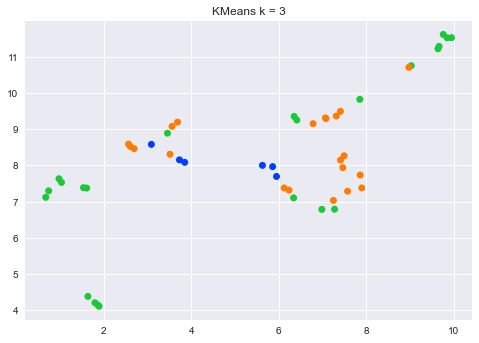

In [25]:
K = 3
kmeans_labels = cluster.KMeans(K).fit_predict(scaled_principal_components_df.values
)

cluster_colors = [cmap[x] 
                  for x in kmeans_labels]

plt.scatter(*standard_embedding.T, linewidth=0, c=cluster_colors)
plt.title(f'KMeans k = {K}')

Text(0.5, 1.0, 'HDBSCAN min_cluster size = 2')

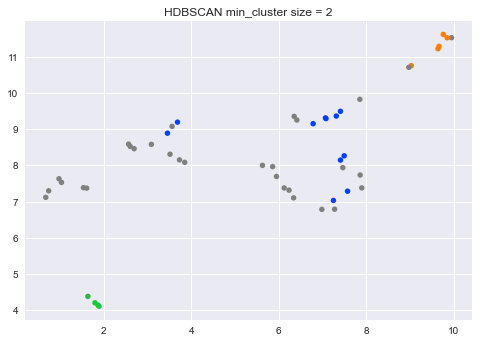

In [26]:
min_cluster_size = 2

clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit(scaled_principal_components_df.values)
labels = clusterer.labels_

cluster_colors = [cmap[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_ )]
plt.scatter(*standard_embedding.T, s=30, linewidth=0, c=cluster_member_colors)

plt.title(f'HDBSCAN min_cluster size = {min_cluster_size}')

Text(0.5, 1.0, 'HDBSCAN outliers')

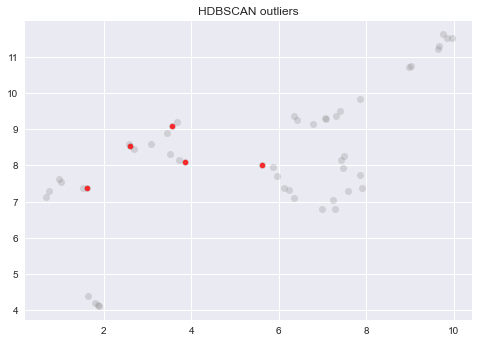

In [27]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*standard_embedding.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*standard_embedding[outliers].T, s=30, linewidth=0, c='red', alpha=0.8)
plt.title(f'HDBSCAN outliers')

Text(0.5, 1.0, 'condensed_tree')

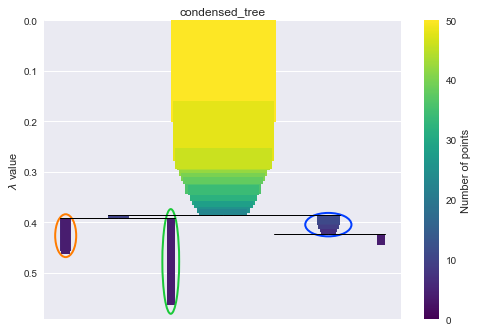

In [28]:
clusterer.condensed_tree_
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=cmap)
plt.title("condensed_tree")

## KMEANS PCA

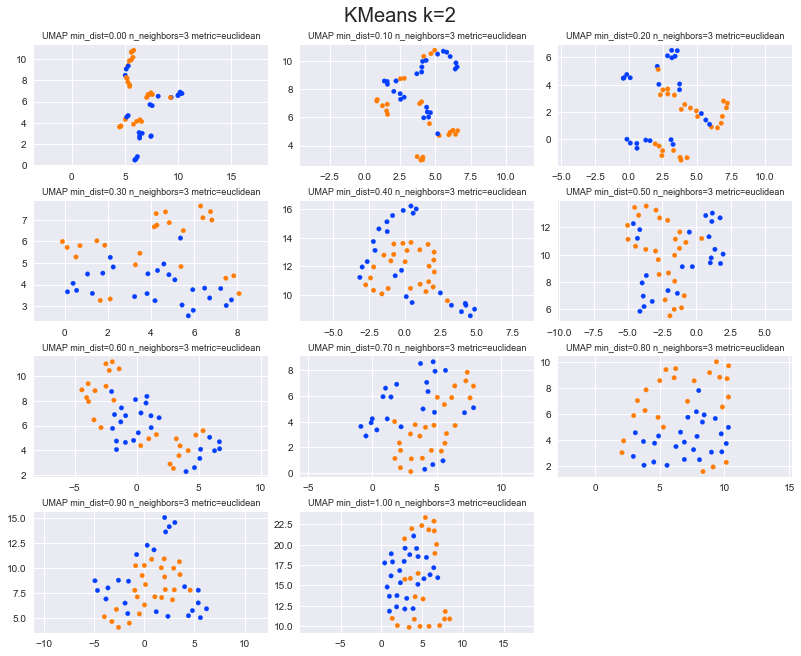

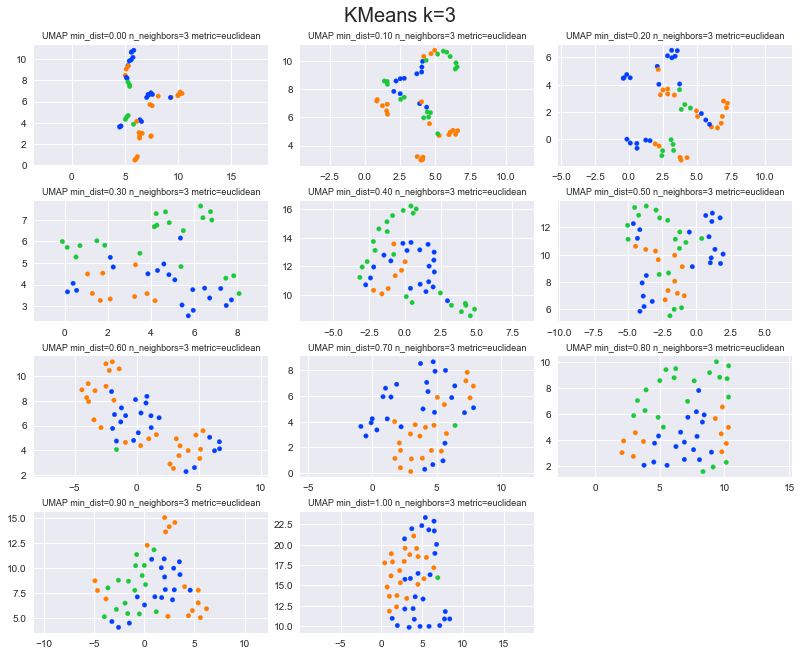

In [29]:
path = '../data/features/plots/Kmeans_PCA'

k_list = [2, 3]

kmeans_plots(k_list, scaled_principal_components_df.values, metric='euclidean', n_neighbors=3, figsize = (11, 9), save=True, path=path)

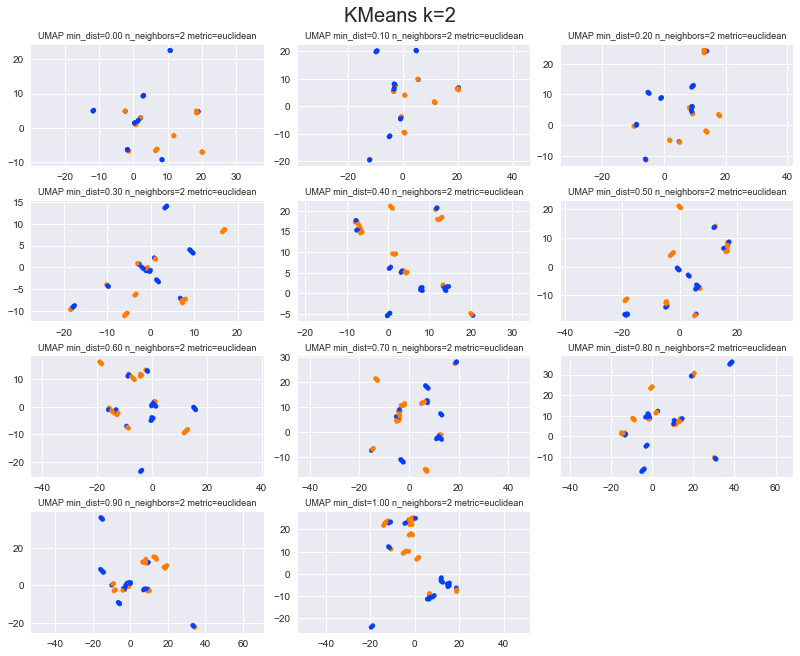

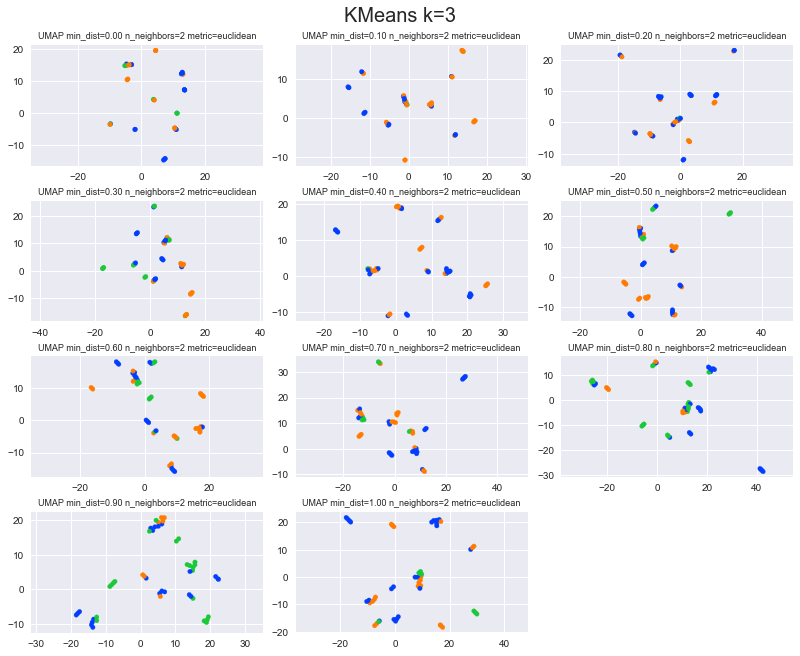

In [32]:
kmeans_plots(k_list, scaled_principal_components_df.values, metric='euclidean', n_neighbors=2, figsize = (11, 9), save=True, path=path)

## HDBSCAN_PCA

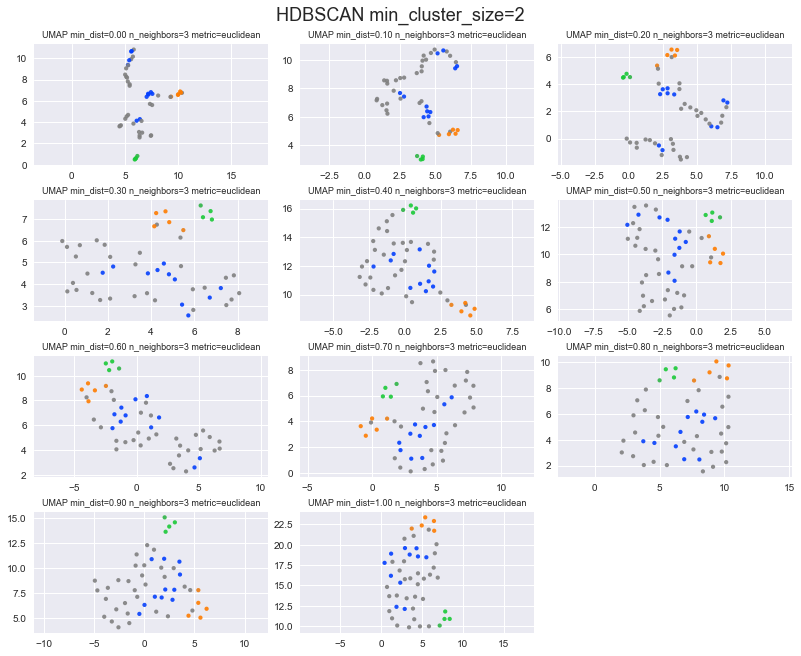

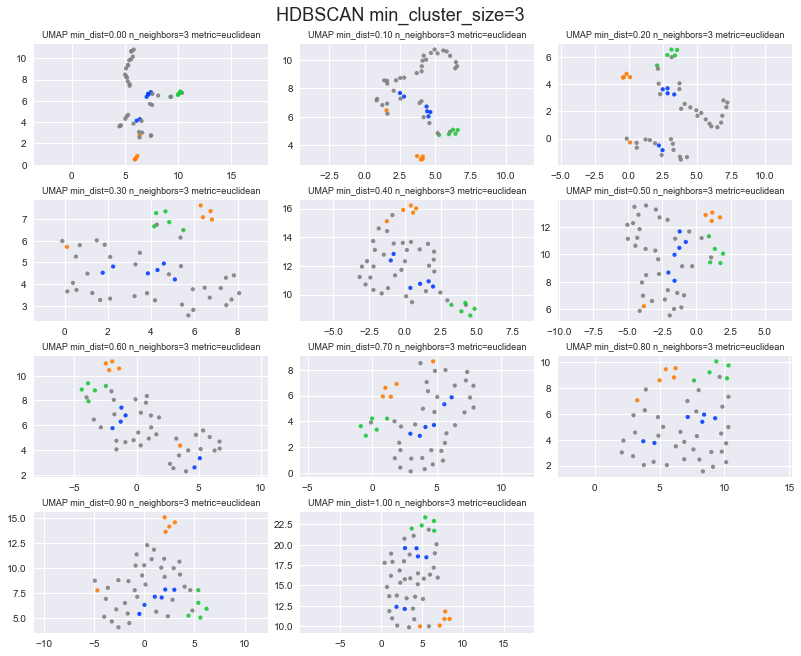

In [30]:
path = '../data/features/plots/HDBSCAN_PCA'


min_cluster_size_list = [2, 3]

HDBSCAN_plots(min_cluster_size_list, scaled_principal_components_df.values, step=0.1 , metric='euclidean', n_neighbors=3,  figsize = (11, 9), cols = 3, save=True, path=path)

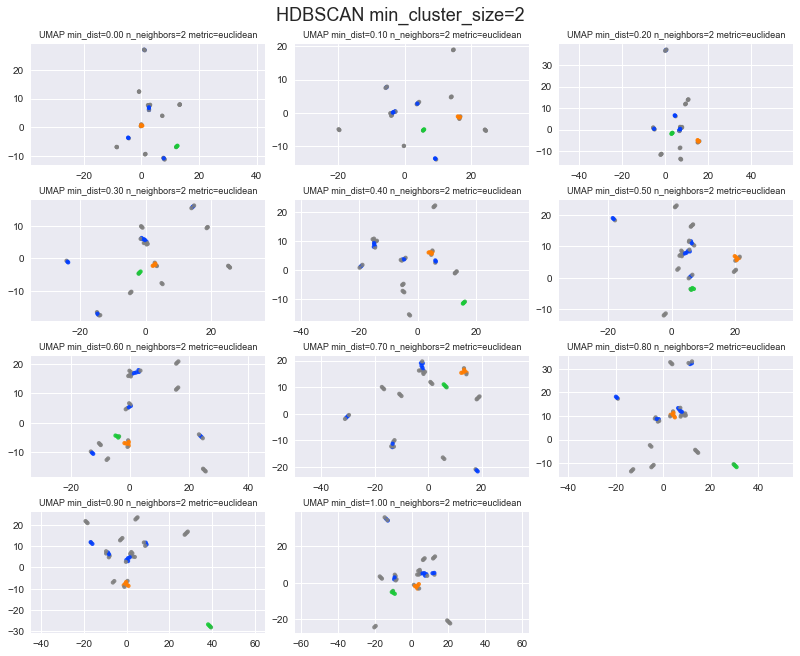

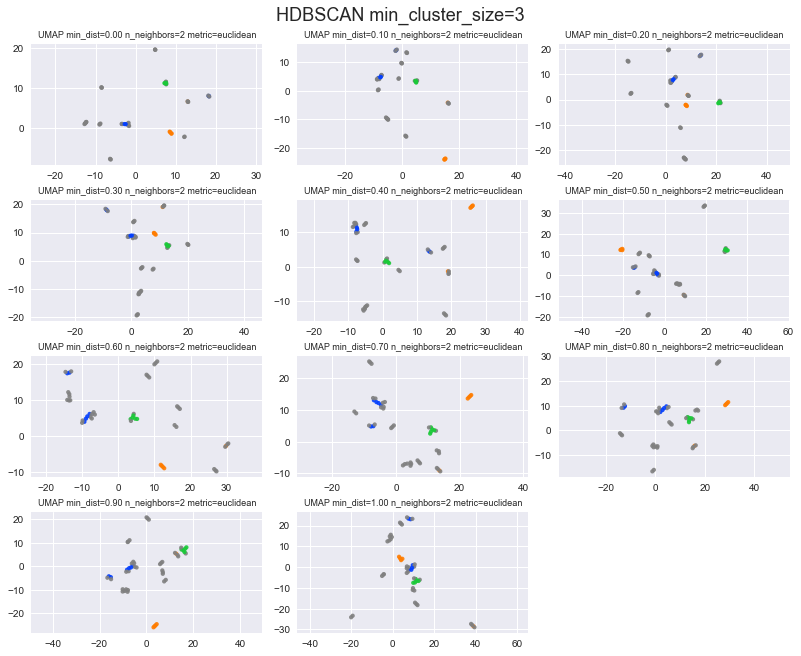

In [31]:
HDBSCAN_plots(min_cluster_size_list, scaled_principal_components_df.values, step=0.1 , metric='euclidean', n_neighbors=2,  figsize = (11, 9), cols = 3, save=True, path=path)